In [19]:
import turtle
import numpy as np
from math import atan2
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants for the Lorenz-like system
rho = 43.5
sigma = 10.0
beta = 8.0 / 3.0
d0 = 19.0 / 3.0

# Initial scale and dynamic range
initial_scale = 10
scale = 10
offset_x, offset_y = 0, 0  # To center the plot dynamically

# Define the system of equations
def f(state, t):
    x, y, z, y1, z1 = state
    return (
        sigma * (y - x),
        x * (rho - z) - y,
        x * y - x * y1 - beta * z,
        x * z - 2 * x * z1 - d0 * y1,
        2 * x * y1 - 4 * beta * z1
    )

# Initial conditions and time range
state0 = [1.0, 1.0, 1.0, 1.0, 1.0]
t = np.arange(0.0, 200.0, 0.01)  # Increased time range

# Solve the differential equations
states = odeint(f, state0, t)

# Get bounds for dynamic scaling
x_vals, z_vals = states[:, 0], states[:, 2]
offset_x, offset_y = np.mean(x_vals), np.mean(z_vals)
max_range = max(np.max(np.abs(x_vals)), np.max(np.abs(z_vals)))
scale = 400 / max_range

# Initialize Turtle
turtle.screensize(canvwidth=7680, canvheight=4800, bg="black")
plotter = turtle.Turtle()
plotter.speed("fastest")
plotter.pensize(1)
plotter.radians()
plotter.pendown()

# Create a color gradient
colors = plt.cm.plasma(np.linspace(0, 1, len(states)))

# Function to draw using turtle dynamically
def draw_lorenz():
    global states
    while True:
        for i, (x, y, z, y1, z1) in enumerate(states):
            plotter.setpos((x - offset_x) * scale, (z - offset_y) * scale)
            plotter.setheading(atan2(z1, y1))
            plotter.pencolor(colors[i][0], colors[i][1], colors[i][2])
        # Recompute states dynamically
        final_state = states[-1]
        t_next = np.arange(t[-1] + 0.01, t[-1] + 200.0, 0.01)
        states = odeint(f, final_state, t_next)

# Optional: Matplotlib animation for visualization
def matplotlib_animation():
    fig, ax = plt.subplots()
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        line.set_data(states[:frame, 0], states[:frame, 2])
        return line,

    ani = FuncAnimation(fig, update, frames=len(states), init_func=init, blit=True)
    plt.show()

# Run the options
print("Choose visualization mode:\n1: Turtle Continuous Drawing\n2: Matplotlib Animation")
choice = input("Enter choice (1 or 2): ")
if choice == "1":
    draw_lorenz()
elif choice == "2":
    matplotlib_animation()
else:
    print("Invalid choice.")

# Keep the window open until closed
turtle.done()


Choose visualization mode:
1: Turtle Continuous Drawing
2: Matplotlib Animation


Terminator: 

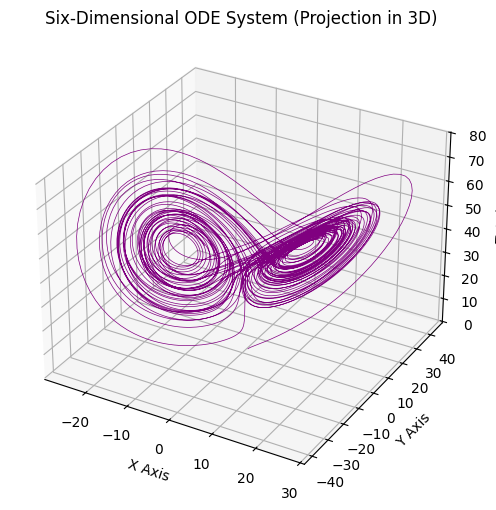

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants for the system
sigma = 10.0
rho = 43.5
beta = 2.667
d0 = 19.0 / 3.0
c1, c2, c3, c4, c5 = 1.0, 0.5, 0.5, 0.3, 0.1
k = 0.5

# Define the six-dimensional ODE system
def system(state, t):
    x, y, z, y1, z1, r = state
    dxdt = sigma * (y - x) + c1 * r
    dydt = x * (rho - z) - y + c2 * y1
    dzdt = x * y - beta * z + c3 * z1
    dy1dt = x * z - 2 * x * z1 - d0 * y1 + c4 * r
    dz1dt = 2 * x * y1 - 4 * beta * z1
    drdt = -k * r + c5 * (y1 * z - z1 * y)
    return [dxdt, dydt, dzdt, dy1dt, dz1dt, drdt]

# Initial conditions
state0 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# Time points
t = np.linspace(0, 50, 10000)

# Solve the system
states = odeint(system, state0, t)

# Extract variables for plotting
x_vals, y_vals, z_vals, _, _, _ = states.T

# Plotting the 3D phase space trajectory
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals, color='purple', lw=0.5)
ax.set_title("Six-Dimensional ODE System (Projection in 3D)")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
plt.show()

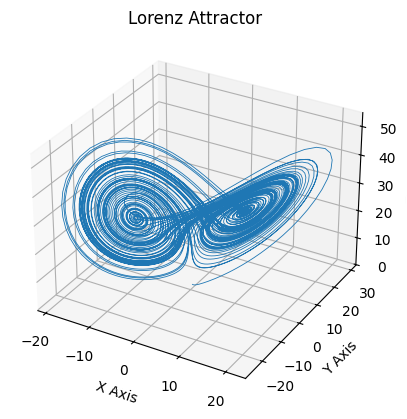

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.6)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

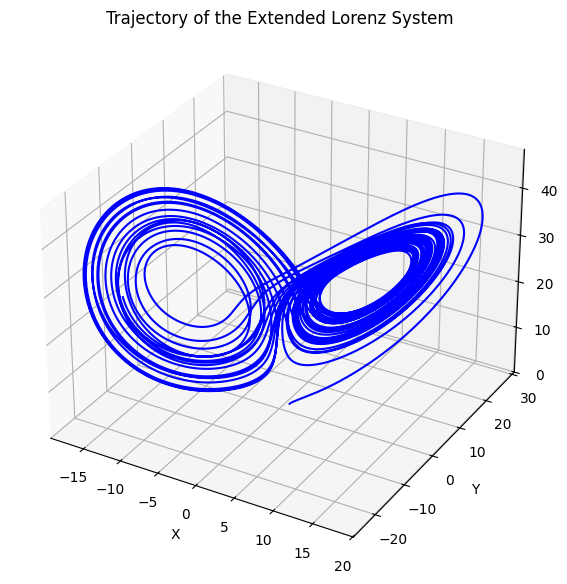

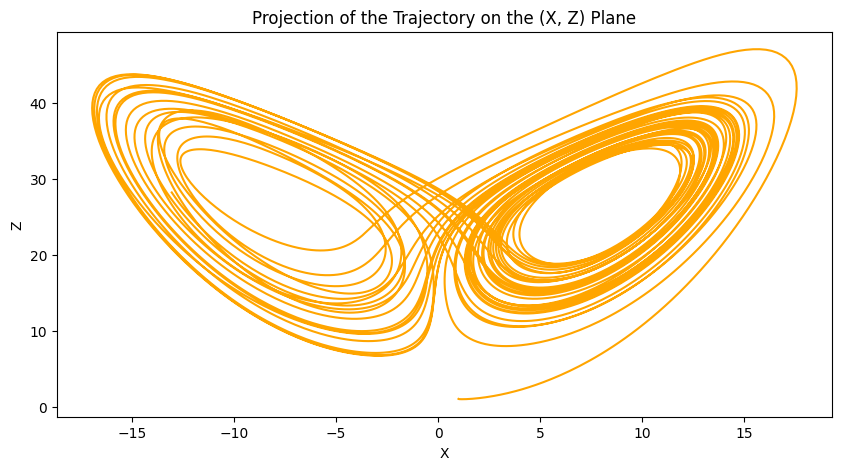

In [31]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the parameters for the system
sigma = 10      # Prandtl number
b = 8/3         # Lorenz constant
r_T = 28       # Rayleigh parameter for temperature
r_C = 28        # Rayleigh parameter for scalar
Le_inv = 0.1    # Inverse Lewis number
s = 10          # Rotational parameter

# Define the physically extended Lorenz system
def extended_lorenz(t, state):
    X, Y, Z, V, W, U = state
    
    # Define the system of ODEs
    dX_dt = sigma * (Y - X) - sigma * Le_inv * W + s * V
    dY_dt = -X * Z + r_T * X - Y
    dZ_dt = X * Y - b * Z
    dV_dt = -X - sigma * V
    dW_dt = -X * U + r_C * X - Le_inv * W
    dU_dt = X * W - Le_inv * b * U

    return [dX_dt, dY_dt, dZ_dt, dV_dt, dW_dt, dU_dt]

# Initial conditions
initial_conditions = [1, 1, 1, 0, 0, 0]

# Integration time parameters
t_span = (0, 37)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the system using Runge-Kutta integration
solution = solve_ivp(extended_lorenz, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract the solutions
X, Y, Z, V, W, U = solution.y

# Plot the trajectory of the system in 3D phase space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, color='blue')
ax.set_title("Trajectory of the Extended Lorenz System")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# Plot the projection on the (X, Z) plane
plt.figure(figsize=(10, 5))
plt.plot(X, Z, color='orange')
plt.title("Projection of the Trajectory on the (X, Z) Plane")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()
